# 1. Imports

In [2]:
#General
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
from sklearn.preprocessing          import StandardScaler
from sklearn                        import preprocessing, linear_model
from sklearn.metrics                import r2_score, mean_squared_error,confusion_matrix,explained_variance_score
from sklearn.model_selection        import train_test_split, cross_val_score, cross_val_predict,GridSearchCV

#Models
from sklearn.linear_model           import LinearRegression, Ridge
from sklearn.tree                   import DecisionTreeRegressor
from sklearn.svm                    import SVR
from sklearn.ensemble               import RandomForestRegressor

# 2. Load Data

In [3]:
#Load the file generated from EDA.
file = 'Asteroid_EDA_Clean.csv'
df = pd.read_csv(file, sep=',', index_col=0)

In [4]:
#Verify that the data loaded correctly.
df.head().T

,0,1,2,3,4
semi-major_axis(au),2.76917,2.77247,2.66915,2.36142,2.57425
eccentricity,0.076009,0.230337,0.256942,0.0887215,0.191095
x-y_inclination(deg),10.5941,34.8362,12.9889,7.14177,5.36699
longitude_asc_node,80.3055,173.08,169.853,103.811,141.577
argument_perihelion,73.5977,310.049,248.139,150.729,358.688
perihelion_dist(au),2.55868,2.13386,1.98333,2.15191,2.08232
aphelion_dist(au),2.97965,3.41107,3.35497,2.57093,3.06617
data_arc(d),8822,72318,72684,24288,63507
n_obs_used,1002,8490,7104,9325,2916
diameter,939.4,545,246.596,525.4,106.699


# 3. Feature Engineering

In [5]:
#Check for categorical variables.
df.select_dtypes(include=['object']).head().T

,0,1,2,3,4
class,MBA,MBA,MBA,MBA,MBA


In [6]:
#Create dummy variables for class.
df = pd.get_dummies(df, columns=['class'])

In [7]:
df.columns

Index(['semi-major_axis(au)', 'eccentricity', 'x-y_inclination(deg)',
       'longitude_asc_node', 'argument_perihelion', 'perihelion_dist(au)',
       'aphelion_dist(au)', 'data_arc(d)', 'n_obs_used', 'diameter',
       'mean_motion(deg/d)', 'orbital_period(d)', 'mean_anomaly(deg)',
       'class_AMO', 'class_APO', 'class_AST', 'class_ATE', 'class_CEN',
       'class_IMB', 'class_MBA', 'class_MCA', 'class_OMB', 'class_TJN',
       'class_TNO'],
      dtype='object')

# 4. Standarize Data and Split into Training and Test Sets

In [8]:
#Split data into features and target.
y = df['diameter']
X = df.drop(columns = 'diameter')

In [9]:
#Create training and test data.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [10]:
#Standarize the features

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

# 5. Initial Models

### 5.1 Linear Regression

In [11]:
lm = LinearRegression()
lm.fit(X_train, y_train)
lm_score = lm.score(X_train, y_train)
lm_pred = lm.predict(X_test)

print(lm_score)

0.45267188148068405


In [12]:
lm_mse = mean_squared_error(y_test, lm_pred)
lm_rmse = np.sqrt(lm_mse)
lm_score_test = lm.score(X_test, y_test)

print('Test Score:, ', lm_score_test)
print('MSE: ',round(lm_mse,2))
print('RMSE: ',round(lm_rmse,2))
print('Explained Variance Score: ',round(explained_variance_score(y_test, lm_pred),2))

Test Score:,  0.3008869955408313
MSE:  68.58
RMSE:  8.28
Explained Variance Score:  0.3


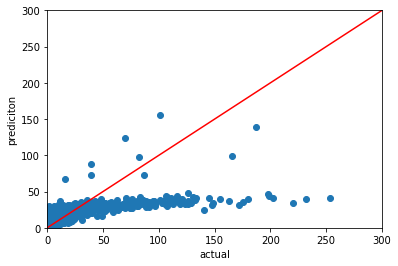

In [13]:
plt.scatter(y_test,lm_pred)
plt.plot([0,300],[0,300],c = 'red')
plt.xlabel('actual')
plt.ylabel('prediciton')
plt.xlim(0, 300) 
plt.ylim(0, 300) 
plt.show()

In [14]:
#Cross Validation
cvx, cvxt, cvy, cvyt = train_test_split(X, y, test_size = 0.2)
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, cv = 5)
print('Scores: ',scores)
print('Mean Scores:',np.mean(scores))
print('Standard Deviation of Scores: ',np.std(scores))

Scores:  [0.3860002  0.4965816  0.40301491 0.42120102 0.42772953]
Mean Scores: 0.4269054516407055
Standard Deviation of Scores:  0.037767665763228084


### Lasso Regression

In [15]:
lasso = linear_model.Lasso()
lasso.fit(X_train, y_train)
lasso_score = lasso.score(X_train, y_train)
lasso_pred = lasso.predict(X_test)

print(lasso_score)

0.3581969631181513


In [16]:
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_rmse = np.sqrt(lasso_mse)

print('MSE: ',round(lasso_mse,2))
print('RMSE: ',round(lasso_rmse,2))
print('Explained Variance Score: ',round(explained_variance_score(y_test, lasso_pred),2))

MSE:  71.62
RMSE:  8.46
Explained Variance Score:  0.27


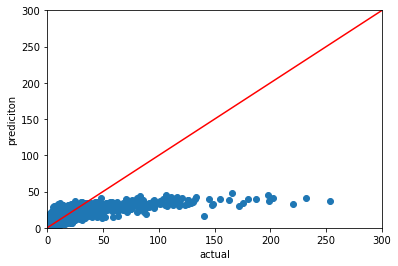

In [17]:
plt.scatter(y_test,lasso_pred)
plt.plot([0,300],[0,300],c = 'red')
plt.xlabel('actual')
plt.ylabel('prediciton')
plt.xlim(0, 300) 
plt.ylim(0, 300) 
plt.show()

### Ridge Regression

In [18]:
ridge = Ridge()
ridge.fit(X_train, y_train)
ridge_score = lasso.score(X_train, y_train)
ridge_pred = ridge.predict(X_test)

print(ridge_score)

0.3581969631181513


In [19]:
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)

print(ridge_mse)
print(ridge_rmse)

68.58347970183819
8.281514336269556


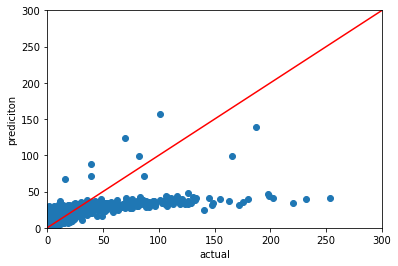

In [20]:
plt.scatter(y_test,ridge_pred)
plt.plot([0,300],[0,300],c = 'red')
plt.xlabel('actual')
plt.ylabel('prediciton')
plt.xlim(0, 300) 
plt.ylim(0, 300) 
plt.show()

### Decision Tree Regression

In [21]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
dtr_score = dtr.score(X_train, y_train)
dtr_pred = dtr.predict(X_test)

print(dtr_score)

1.0


In [22]:
dtr_score_test = dtr.score(X_test, y_test)
print(dtr_score_test)

0.36221655934080477


In [23]:
dtr_mse = mean_squared_error(y_test, dtr_pred)
dtr_rmse = np.sqrt(dtr_mse)

print(dtr_mse)
print(dtr_rmse)

62.5598246402572
7.909476887902081


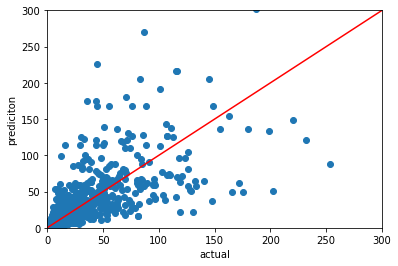

In [24]:
plt.scatter(y_test,dtr_pred)
plt.plot([0,300],[0,300],c = 'red')
plt.xlabel('actual')
plt.ylabel('prediciton')
plt.xlim(0, 300) 
plt.ylim(0, 300) 
plt.show()

### Random Forest Regressor

In [25]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_score = rf.score(X_train, y_train)
rf_pred = rf.predict(X_test)

print(rf_score)

C:\Users\eboci_000\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9488218284582807


In [26]:
rf_score_test = rf.score(X_test, y_test)
print(rf_score_test)

0.5288389541226668


In [27]:
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)

print(rf_mse)
print(rf_rmse)

46.215926172276944
6.798229635153327


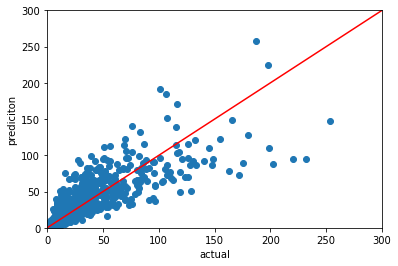

In [28]:
plt.scatter(y_test,rf_pred)
plt.plot([0,300],[0,300],c = 'red')
plt.xlabel('actual')
plt.ylabel('prediciton')
plt.xlim(0, 300) 
plt.ylim(0, 300) 
plt.show()

23


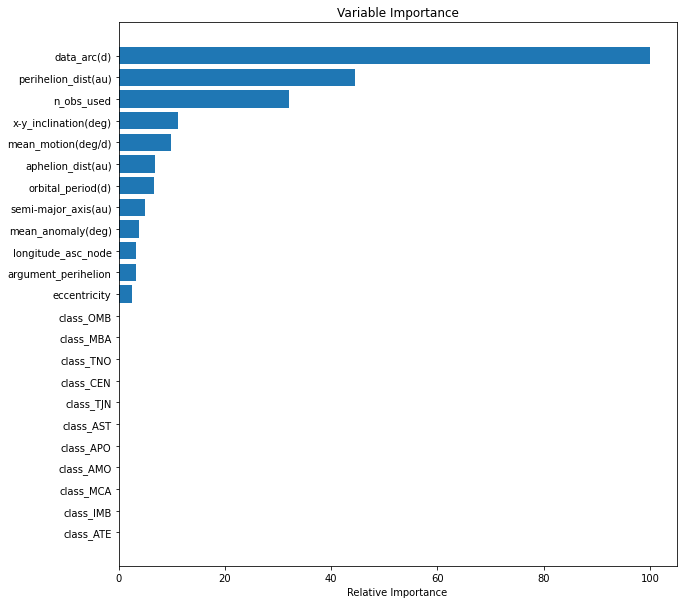

In [29]:
feature_importance = rf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

#GridSearchCV for hyper-parameter tuning
rf2 = RandomForestRegressor()
param_grid = {'n_estimators':np.arange(1,500),'criterion':['mse', 'mae']}
rf_cv= GridSearchCV(rf2, param_grid, cv=5, n_jobs= -1)
rf_cv.fit(X_train,y_train)

print("Best Score:" + str(rf_cv.best_score_))
print("Best Parameters: " + str(rf_cv.best_params_))

rf2 = RandomForestRegressor(n_estimators =rf_cv.best_params_['n_estimators'],  criterion = rf_cv.best_params_['criterion'])
rf2.fit(X_train,y_train)

rf2_pred = rf2.predict(X_test)

plt.scatter(y_test,rf2_pred)
plt.plot([0,300],[0,300],c = 'red')
plt.xlabel('actual')
plt.ylabel('prediciton')
plt.xlim(0, 300) 
plt.ylim(0, 300) 
plt.show()